In [19]:
import numpy as np

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import Aer

from scipy.optimize import minimize
from MSA_class import MultipleSequenceAlignment
from Qiskit_class import QiskitSimulation


import matplotlib.pyplot as plt

plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")



In [49]:
my_strings   = np.array(["AG","G"])
my_penalties = np.array([1,1,1])*100
my_msa       = MultipleSequenceAlignment(strings = my_strings, penalties = my_penalties) 

solutions = [my_msa.initial_bitstring,np.array([1,0,0,1,0,1],dtype=np.float64)]



In [50]:
p = 6
theta_0 = np.ones(p)

my_simulation = QiskitSimulation(initial_MSA=my_msa, theta_0=theta_0, backend_name="qasm_simulator", normalize_weights=True, shots=100000)


In [51]:
options = {"disp":True,"maxiter": 1000}
res = minimize(fun = my_simulation.execute_circuit, x0 = theta_0, method='COBYLA',options = options)
res

     fun: -379.6086839
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 70
  status: 1
 success: True
       x: array([0.68214774, 0.39366409, 0.70024982, 1.00779886, 1.16486323,
       1.20307637])


   Normal return from subroutine COBYLA

   NFVALS =   70   F =-3.796087E+02    MAXCV = 0.000000E+00
   X = 6.821477E-01   3.936641E-01   7.002498E-01   1.007799E+00   1.164863E+00
       1.203076E+00


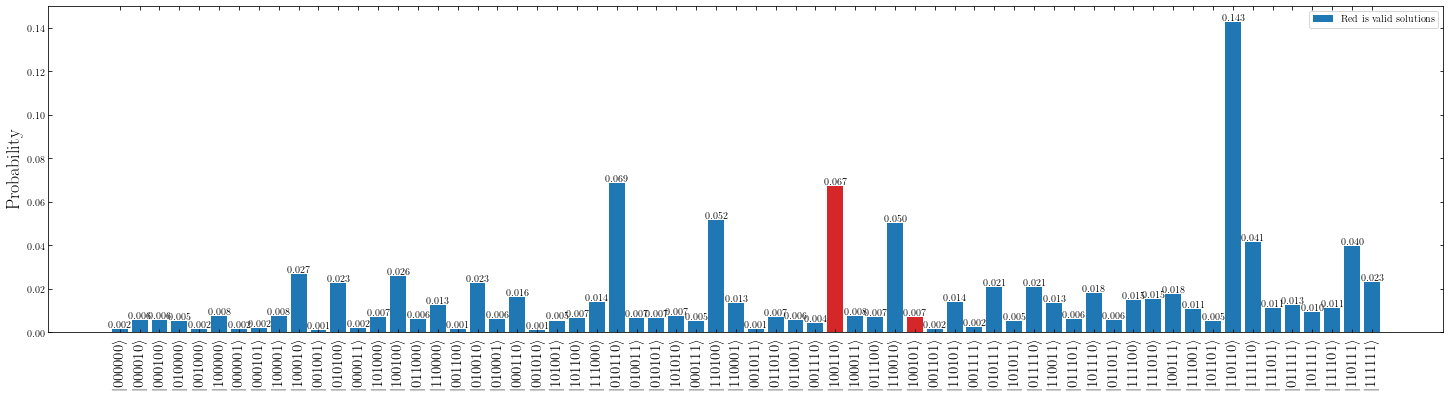

In [52]:
my_simulation.plot_count_histogram(counts = my_simulation.current_counts, solutions = solutions)

In [37]:
idx = 2
my_simulation.print_solution(idx)

#### 2'th most probale state according to simulation ####
100110
with corresponding MSA:
[['A' 'G']
 ['G' '_']]
#########################################################
